### Import module

In [1]:
import os
from PIL import Image, ImageEnhance
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import pandas as pd


[70.9981226312147, 59.25566927537914, 28.783393786214326, 7.042071295985487, 98.78341885640974, 51.28702366181372, -5.33488696156931, 48.47868977171283, 50.150254135610126, 54.12684290644947, 136.06243887689732, 58.67887310145496, -17.4356742869373, 71.50927559165368, 83.18380394755216, 78.40347050293602, -15.343869488984367, 46.82201930330394, 35.42925068285594, 36.69911601292762, 34.01202756860964, 62.93299425634878, -21.069969240287136, 24.073446247292637, -31.26362155575137, 159.06974974675938, 87.65208486291903, 86.44964077487323, -21.57260702519467, 165.13793016926144, -2.897699172939994, 101.94242362740819, 70.38665293303453, 31.32418056804054, 150.39748948946328, 101.53304248938372, 56.038749202135726, -21.040770819669106, 102.38807572629278, 2.440063008510073, 63.79102729714974, 105.87092722819645, -8.921659266930149, -1.1106652928512375, 45.402864066323716, 43.229389248222006, 77.12837259548894, 3.8850269050330013, 3.473488242634062, 77.8420558779725, 33.95883700524142, 31.21

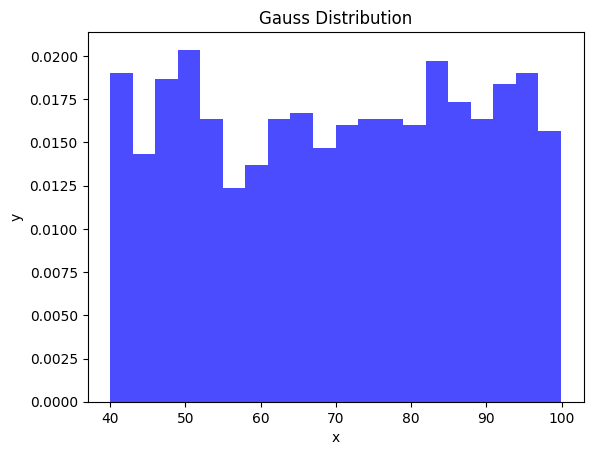

In [2]:
import random as rnd
import matplotlib.pyplot as plt
import pandas as pd

mean = 60
stdev = 50

rgaus = [rnd.gauss(mean, stdev) for i in range(1000)]
runiv = [rnd.uniform(40,100) for i in range (1000)]
print(rgaus)
#membuat histogtam
plt.hist(runiv, bins=20, density=True, alpha=0.7, color='b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gauss Distribution')
plt.show()

### Load data

In [48]:
import random
def factor_activity(n):
  numbers = []
  for _ in range(n):
    numbers.append(random.choice([1.2, 1.375, 1.55, 1.725]))
  return numbers

def calculate_bmr(row):
  age = row['usia']
  weight = row['berat badan']
  height = row['tinggi badan']
  activity_factor = random.choice([1.2, 1.375, 1.55, 1.725])

  # Calculate BMR using Mifflin-St Jeor equation (for adults)
  bmr = 10 * weight + 6.25 * height - 5 * age + 5 
  # Apply activity factor to get daily caloric needs
  daily_calories = bmr * activity_factor

  return f'{daily_calories:0.2f}'



n = 100
data = {'usia': np.random.randint(15,60,n),
        'berat badan' : np.random.uniform(40,100,n),
        'tinggi badan' : np.random.uniform(140, 190, n),
        'factor activity ' : factor_activity(n)}

df2 = pd.DataFrame(data)

df2['bmr'] = df2.apply(calculate_bmr, axis=1) 


df2.head()

,usia,berat badan,tinggi badan,factor activity,bmr
0,40,54.797525,140.335886,1.550,1906.62
1,27,84.606727,144.599387,1.200,2794.18
2,55,57.200281,186.416872,1.550,1760.53
3,19,61.935598,188.547693,1.375,2647.06
4,21,57.422278,148.860029,1.375,1931.32


Hitung Ratio Karbo, Protein, Lemak

Karbohidrat: 45-65% dari total kalori. (dibagi 4)

Protein: 10-35% dari total kalori. (dibagi 4)

Lemak: 20-35% dari total kalori. (dibagi 9)

Jika Anda membutuhkan 2000 kalori per hari, maka:

Karbohidrat: 2000 kalori x 0.45 = 900 kalori (900 kalori / 4 kalori/gram = 225 gram karbohidrat)

Protein: 2000 kalori x 0.25 = 500 kalori (500 kalori / 4 kalori/gram = 125 gram protein)

Lemak: 2000 kalori x 0.3 = 600 kalori (600 kalori / 9 kalori/gram = 67 gram lemak)

In [25]:
def karbo(row):
    bmr = row['bmr']
    karb_min = (bmr*0.65)/4
    return f'{karb_min:0.2f}'

def protein(row):
    bmr = row['bmr']
    prot_min = (bmr*0.35)/4
    return f'{prot_min:0.2f}'

def lemak(row):
    bmr = row['bmr']
    lem_min = (bmr*0.35)/9
    return f'{lem_min:0.2f}'

df2['karbo_minimum'] = df2.apply(karbo, axis=1)
df2['protein_minimum'] = df2.apply(protein, axis=1)
df2['lemak_minimum'] = df2.apply(lemak, axis=1)

df2.head()

,usia,berat badan,tinggi badan,factor activity,bmr,karbo_minimum,protein_minimum,lemak_minimum
0,30,56.629073,154.419938,1.200,1906.32,309.78,166.80,74.13
1,37,78.550066,186.658400,1.200,2126.54,345.56,186.07,82.70
2,38,86.792695,181.071515,1.375,2177.55,353.85,190.54,84.68
3,31,45.324247,140.112874,1.200,2033.69,330.47,177.95,79.09
4,45,90.537036,160.696368,1.375,2619.07,425.60,229.17,101.85


In [49]:
df = pd.read_csv('D:\\S2\\Smt 1\\Metodologi Penelitian\\database\\basis data.csv')

In [53]:
df

,Nama_Makanan,Jenis_makanan,Kalori,Lemak,Karbohidrat,Protein
0,Pringles Sour Cream,Snack,130.0,6.00,16.00,1.00
1,Gemez Enak,Snack,150.0,6.00,20.00,2.00
2,Purple Sweet Potato Crisp,Snack,110.0,2.00,20.00,1.00
3,Pretzel,Snack,90.0,4.00,11.00,1.00
4,Haribo,Snack,110.0,0.00,26.00,2.00
...,...,...,...,...,...,...
68,Chocolatos,Snack,80.0,5.00,3.00,1.00
69,Nasi Goreng Ayam Baso,Makanan,247.0,9.00,31.47,9.37
70,Mie Ayam,Makanan,421.0,18.74,46.21,16.70
71,Nasi Ayam Goreng,Makanan,329.0,11.96,41.82,12.45


In [52]:
df.head()

,Nama_Makanan,Jenis_makanan,Kalori,Lemak,Karbohidrat,Protein
0,Pringles Sour Cream,Snack,130.0,6.0,16.0,1.0
1,Gemez Enak,Snack,150.0,6.0,20.0,2.0
2,Purple Sweet Potato Crisp,Snack,110.0,2.0,20.0,1.0
3,Pretzel,Snack,90.0,4.0,11.0,1.0
4,Haribo,Snack,110.0,0.0,26.0,2.0


In [51]:
jenis_makanan = df['Jenis_makanan'].value_counts()
print(jenis_makanan)

Jenis_makanan
Snack       50
Minuman     10
Makanan     10
Suplemen     3
Name: count, dtype: int64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Nama_Makanan   73 non-null     object 
 1   Jenis_makanan  73 non-null     object 
 2   Kalori         73 non-null     float64
 3   Lemak          73 non-null     float64
 4   Karbohidrat    73 non-null     float64
 5   Protein        73 non-null     float64
dtypes: float64(4), object(2)
memory usage: 3.6+ KB


### Visualisasi

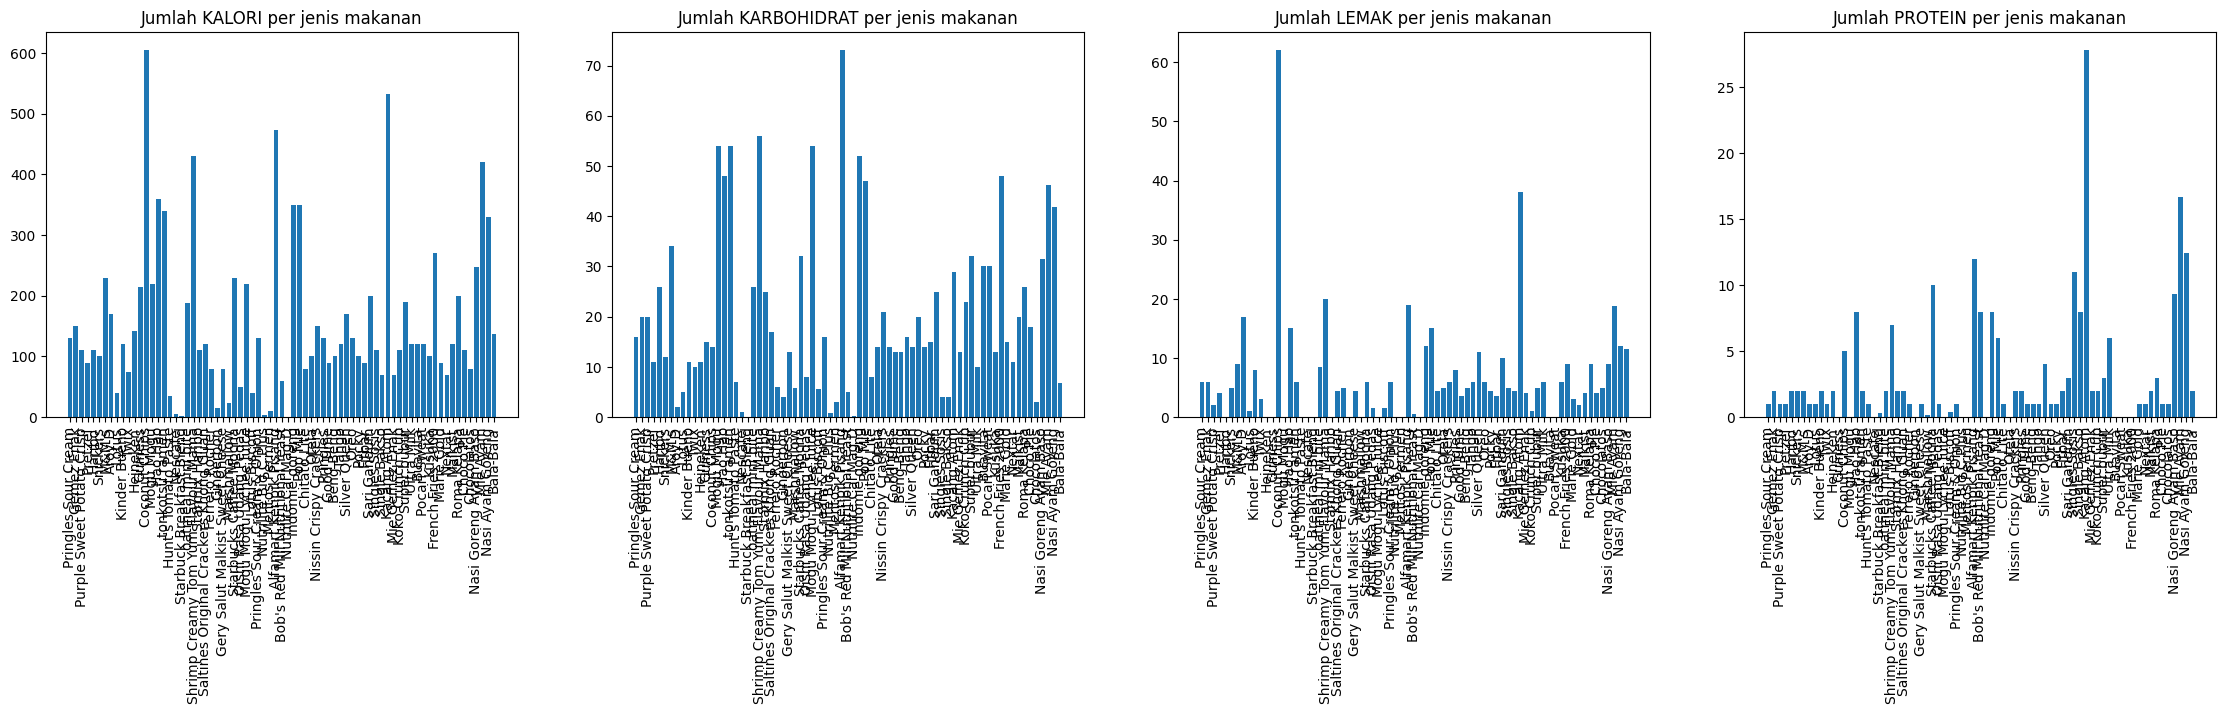

In [7]:
y = df['Kalori']
y1 = df['Karbohidrat']
y2 = df['Lemak']
y3 = df['Protein']
x = df['Nama_Makanan']

plt.figure(figsize=(28,5))

plt.subplot(1, 4, 1)  # 1 baris, 4 kolom, subplot ke-1
plt.bar(x,y)
plt.title("Jumlah KALORI per jenis makanan")
plt.xticks(rotation=90)

plt.subplot(1, 4, 2) 
plt.bar(x,y1)
plt.title("Jumlah KARBOHIDRAT per jenis makanan")
plt.xticks(rotation=90)



plt.subplot(1, 4, 3) 
plt.bar(x,y2)
plt.title("Jumlah LEMAK per jenis makanan")
plt.xticks(rotation=90)

plt.subplot(1, 4, 4) 
plt.bar(x,y3)
plt.title("Jumlah PROTEIN per jenis makanan")
plt.xticks(rotation=90)

plt.show()

In [26]:
y = df[df['Nama_Makanan']=='Gemez Enak']['Kalori']
y1 = df[df['Nama_Makanan']=='Gemez Enak']['Karbohidrat']
y2 = df[df['Nama_Makanan']=='Gemez Enak']['Protein']
y3 = df[df['Nama_Makanan']=='Gemez Enak']['Lemak']

x = df.columns[2] #kalori
x1 = df.columns[4] #karbo
x2 = df.columns[5] #prot
x3 = df.columns[3] #lemak


### Pengujian

In [9]:
#Search kata

kalori = []
hasil = []
nama_makanan = input("Masukan nama makanan yang kamu makan:")
hasil_pencarian = df[df['Nama_Makanan'].str.contains(nama_makanan, case=False)]
k = hasil_pencarian['Kalori'].astype(float)
kalori.append(k)
hasil.append(hasil_pencarian['Nama_Makanan'].values)

nama_makanan1 = input("Masukan nama makanan yang kamu makan:")
hasil_pencarian = df[df['Nama_Makanan'].str.contains(nama_makanan1, case=False)]
k1 = hasil_pencarian['Kalori'].astype(float)
kalori.append(k1)
hasil.append(hasil_pencarian['Nama_Makanan'].values)


#jumlahkan kalori yang sudah dimasukan
print("makanan yang makan", hasil)
print("jumlah kalori terkumpul", np.sum(kalori))



makanan yang makan [array(['Indomie goreng'], dtype=object), array(['Oreo'], dtype=object)]
jumlah kalori terkumpul 480.0


In [10]:
import pandas as pd

# Contoh DataFrame
data = {'Nama': ['Andi', 'Budi', 'Cici'],
        'Usia': [25, 30, 22]}
df3 = pd.DataFrame(data)

# Mengambil nilai-nilai dalam kolom 'Usia'
usia = df3['Usia'].values

print(usia)

[25 30 22]


In [34]:
jumlah=int(input("jumlah makanan yang mau dimakan"))
makanan=set()
kal = []
prot = []
karb = []
lem = []

for _ in range(jumlah):
    nama = input("masukan nama makanan")
    nama_makanan = df[df['Nama_Makanan'].str.contains(nama, case=False)]
    makanan.add(nama) #memasukan ke set
    kal.extend(nama_makanan['Kalori'].tolist()) #sama kaya append
    prot.extend(nama_makanan['Protein'].tolist())
    karb.extend(nama_makanan['Karbohidrat'].tolist())
    lem.extend(nama_makanan['Lemak'].tolist())

# Hitung total kalori setelah semua iterasi
total_kalori = np.sum(kal)
total_protein = np.sum(prot)
total_karbo = np.sum(karb)
total_lemak = np.sum(lem)

#ambil data kolom bmr
df2['bmr'] = df2['bmr'].astype(float)
hasil = df2.loc[0,'bmr']
bmr = hasil

#ambil data kolom karbo minimum
df2['karbo_minimum'] = df2['karbo_minimum'].astype(float)
km = df2.loc[0,'karbo_minimum']
karb_min = km

#ambil data kolom protein minimum
df2['protein_minimum'] = df2['protein_minimum'].astype(float)
pm = df2.loc[0,'protein_minimum']
prot_min = pm

#ambil data kolom lemak minimum
df2['lemak_minimum'] = df2['lemak_minimum'].astype(float)
lm = df2.loc[0,'lemak_minimum']
lem_min = lm

#menghitung %
percent_bmr = (total_kalori/bmr)*100
percent_karb = (total_karbo/karb_min)*100
percent_prot = (total_protein/prot_min)*100
percent_lem =(total_lemak/lem_min)*100

print("makanan yang dimakan", makanan)
print("Jumlah kalori terkumpul:", f"{total_kalori:.2f}", "kalori (",f"{percent_bmr:.2f}","% dari kebutuhan tubuh)")
print("Jumlah protein terkumpul:", f"{total_protein:.2f}","gram (",f"{percent_prot:.2f}","% dari kebutuhan tubuh)")
print("Jumlah karbohidrat terkumpul:", f"{total_karbo:.2f}","gram (",f"{percent_karb:.2f}","% dari kebutuhan tubuh)")
print("Jumlah lemak terkumpul:", f"{total_lemak:.2f}","gram (",f"{percent_lem:.2f}","% dari kebutuhan tubuh)")



makanan yang dimakan {'pocari', 'indomie', 'nextar'}
Jumlah kalori terkumpul: 540.00 kalori ( 28.33 % dari kebutuhan tubuh)
Jumlah protein terkumpul: 9.00 gram ( 5.40 % dari kebutuhan tubuh)
Jumlah karbohidrat terkumpul: 93.00 gram ( 30.02 % dari kebutuhan tubuh)
Jumlah lemak terkumpul: 14.00 gram ( 18.89 % dari kebutuhan tubuh)


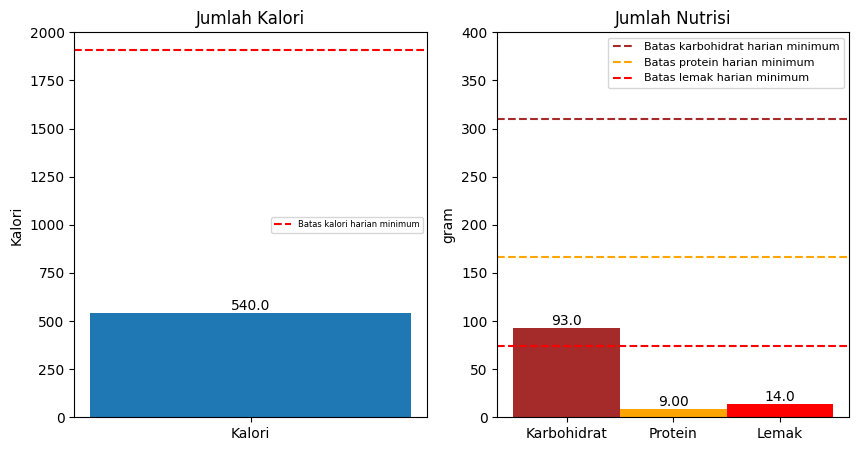

In [43]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.bar(x,total_kalori, width=0.1)
plt.title("Jumlah Kalori")
plt.ylim(0,2000)
plt.axhline(y=bmr, color='red', linestyle='--', label='Batas kalori harian minimum')
plt.legend(fontsize=6)
plt.text(x,total_kalori, total_kalori, ha='center', va='bottom')
plt.ylabel('Kalori')

plt.subplot(1,2,2)
plt.bar(x1,total_karbo, width=1,  color='brown')
plt.text(x1,total_karbo, total_karbo, ha='center', va='bottom')
plt.bar(x2,total_protein, width=1, color='orange')
plt.text(x2,total_protein, f"{total_protein:.2f}", ha='center', va='bottom')
plt.bar(x3,total_lemak, width = 1, color='red')
plt.text(x3,total_lemak, total_lemak, ha='center', va='bottom')

req_nutrisi = int(input("Masukan batas nutrisi yang ingin dilihat(karbohidrat=1, protein=2, lemak=3, semua = 4)"))
if req_nutrisi == 1:
    plt.axhline(y=karb_min, color='brown', linestyle='--', label='Batas karbohidrat harian minimum')
elif req_nutrisi ==2:
    plt.axhline(y=prot_min, color='orange', linestyle='--', label='Batas protein harian minimum')
elif req_nutrisi == 3:
    plt.axhline(y=lem_min, color='red', linestyle='--', label='Batas lemak harian minimum')
elif req_nutrisi == 4:
    plt.axhline(y=karb_min, color='brown', linestyle='--', label='Batas karbohidrat harian minimum')
    plt.axhline(y=prot_min, color='orange', linestyle='--', label='Batas protein harian minimum')
    plt.axhline(y=lem_min, color='red', linestyle='--', label='Batas lemak harian minimum')



plt.title("Jumlah Nutrisi")
plt.ylim(0,400)
plt.legend(fontsize=8)
plt.ylabel("gram")



plt.show()